In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data_stocks.csv')

In [3]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [4]:
'''
1. NASDAQ.AAPL
2. NASDAQ.ADP
3. NASDAQ.CBOE
4. NASDAQ.CSCO
5. NASDAQ.EBAY
'''

'\n1. NASDAQ.AAPL\n2. NASDAQ.ADP\n3. NASDAQ.CBOE\n4. NASDAQ.CSCO\n5. NASDAQ.EBAY\n'

In [5]:
data = df[['DATE','NASDAQ.AAPL','NASDAQ.ADP','NASDAQ.CBOE','NASDAQ.CSCO','NASDAQ.EBAY']]

In [6]:
data.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
0,1491226200,143.6800,102.2300,81.03,33.7400,33.3975
1,1491226260,143.7000,102.1400,81.21,33.8800,33.3950
2,1491226320,143.6901,102.2125,81.21,33.9000,33.4100
3,1491226380,143.6400,102.1400,81.13,33.8499,33.3350
4,1491226440,143.6600,102.0600,81.12,33.8400,33.4000


In [7]:
data['DATE'] = pd.to_datetime(data['DATE'])

/home/local/SIRIONLABS/nikhil.bansal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
data.set_index('DATE',inplace=True)

In [9]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA 

In [10]:
APPL = data[['NASDAQ.AAPL']]
ADP = data[['NASDAQ.ADP']]
CBOE = data[['NASDAQ.CBOE']]
CSCO = data[['NASDAQ.CSCO']]
EBAY = data[['NASDAQ.EBAY']]

In [11]:
APPL.head()

,NASDAQ.AAPL
DATE,
1970-01-01 00:00:01.491226200,143.6800
1970-01-01 00:00:01.491226260,143.7000
1970-01-01 00:00:01.491226320,143.6901
1970-01-01 00:00:01.491226380,143.6400
1970-01-01 00:00:01.491226440,143.6600


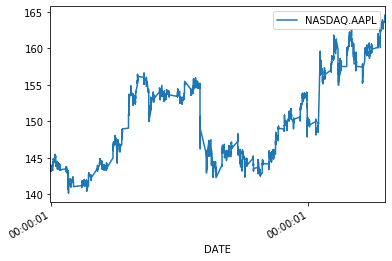

In [27]:
APPL.plot()

In [33]:
# to check if the data is stationary or not 
# If the value is less than 2 then we can say the data is stationary (less correraltion )
sm.stats.durbin_watson(APPL)

array([3.85921421e-07])

In [34]:
sm.stats.durbin_watson(ADP)

array([5.15045512e-07])

In [35]:
sm.stats.durbin_watson(CBOE)

array([2.71132274e-07])

In [36]:
sm.stats.durbin_watson(CSCO)

array([4.41426683e-07])

In [37]:
sm.stats.durbin_watson(EBAY)

array([4.45419397e-07])

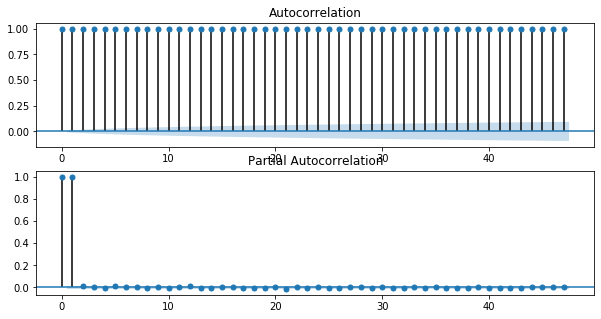

In [39]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(APPL,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(APPL,ax=ax2)

In [26]:
APPL = APPL.sample(500)
ADP = ADP.sample(500)
CBOE = CBOE.sample(500)
CSCO = CSCO.sample(500)
EBAY = EBAY.sample(500)

In [12]:
# !pip install pmdarima

     |████████████████████████████████| 1.5 MB 940 kB/s eta 0:00:01


In [16]:
from pmdarima.arima import auto_arima

In [17]:
arima = auto_arima(APPL,start_p=0,start_q=0,d=1,max_p=5,max_q=5,max_d=5,start_P=0,D=1,start_Q=0,max_P=5,max_Q=5,max_D=5,seasonal=True)

In [22]:
import pandas as pd

predictions = pd.DataFrame(arima.predict(n_period=20))
predictions.columns = ['predicted_sales']
predictions


,predicted_sales
0,163.981520
1,163.980168
2,163.980933
3,163.980348
4,163.980712
5,163.980452
6,163.980621
7,163.980504
8,163.980582
9,163.980529


In [23]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                41266
Model:               SARIMAX(2, 1, 2)   Log Likelihood               39228.287
Date:                Tue, 12 Jan 2021   AIC                         -78446.574
Time:                        23:16:28   BIC                         -78403.435
Sample:                             0   HQIC                        -78432.939
                              - 41266                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2184      0.071     -3.066      0.002      -0.358      -0.079
ar.L2          0.3089      0.102      3.041      0.002       0.110       0.508
ma.L1          0.2094      0.071      2.955      0.003       0.071       0.348
ma.L2         -0.3318      0.100     -3.309      0.001      -0.528      -0.135
sigma2         0.0087   2.15e-06   4058.391      0.000       0.009       0.009
===================================================================================
Ljung-Box (Q):                      109.13   Jarque-Bera (JB):       11891278566.22
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.86   Skew:                            23.66
Prob(H) (two-sided):                  0.00   Kurtosis:                      2632.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
#arima_APPL = ARIMA(APPL,order=(10,2,40))

In [18]:
#model = arima_APPL.fit()

In [37]:
arima_ADP = auto_arima(ADP,start_p=0,start_q=0,d=1,max_p=5,max_q=5,max_d=5,start_P=0,D=1,start_Q=0,max_P=5,max_Q=5,max_D=5,seasonal=True)

In [38]:
import pandas as pd

ADP_predictions = pd.DataFrame(arima_ADP.predict(n_period=20))
ADP_predictions.columns = ['predicted_sales']
ADP_predictions

,predicted_sales
0,102.639015
1,103.010343
2,105.353160
3,101.540911
4,102.259241
5,102.968587
6,102.867966
7,102.979258
8,103.289355
9,102.535743


In [39]:
arima_CBOE = auto_arima(CBOE,start_p=0,start_q=0,d=1,max_p=5,max_q=5,max_d=5,start_P=0,D=1,start_Q=0,max_P=5,max_Q=5,max_D=5,seasonal=True)

In [40]:
import pandas as pd

CBOE_predictions = pd.DataFrame(arima_CBOE.predict(n_period=20))
CBOE_predictions.columns = ['predicted_sales']
CBOE_predictions

,predicted_sales
0,91.555182
1,90.666304
2,92.257743
3,92.060545
4,92.470934
5,92.586460
6,91.880925
7,92.057771
8,92.281268
9,92.237010


In [41]:
arima_CSCO = auto_arima(CSCO,start_p=0,start_q=0,d=1,max_p=5,max_q=5,max_d=5,start_P=0,D=1,start_Q=0,max_P=5,max_Q=5,max_D=5,seasonal=True)

In [42]:
import pandas as pd

CSCO_predictions = pd.DataFrame(arima_CSCO.predict(n_period=20))
CSCO_predictions.columns = ['predicted_sales']
CSCO_predictions

,predicted_sales
0,32.226095
1,32.480386
2,32.187090
3,32.438293
4,32.144492
5,32.214327
6,32.275104
7,32.310031
8,32.256567
9,32.277409


In [43]:
arima_EBAY = auto_arima(EBAY,start_p=0,start_q=0,d=1,max_p=5,max_q=5,max_d=5,start_P=0,D=1,start_Q=0,max_P=5,max_Q=5,max_D=5,seasonal=True)

In [44]:
import pandas as pd

EBAY_predictions = pd.DataFrame(arima_EBAY.predict(n_period=20))
EBAY_predictions.columns = ['predicted_sales']
EBAY_predictions

,predicted_sales
0,35.717323
1,35.996659
2,35.834953
3,36.005809
4,35.892228
5,35.726634
6,35.867597
7,35.876860
8,35.851810
9,35.877793
